<IPython.core.display.Javascript object>


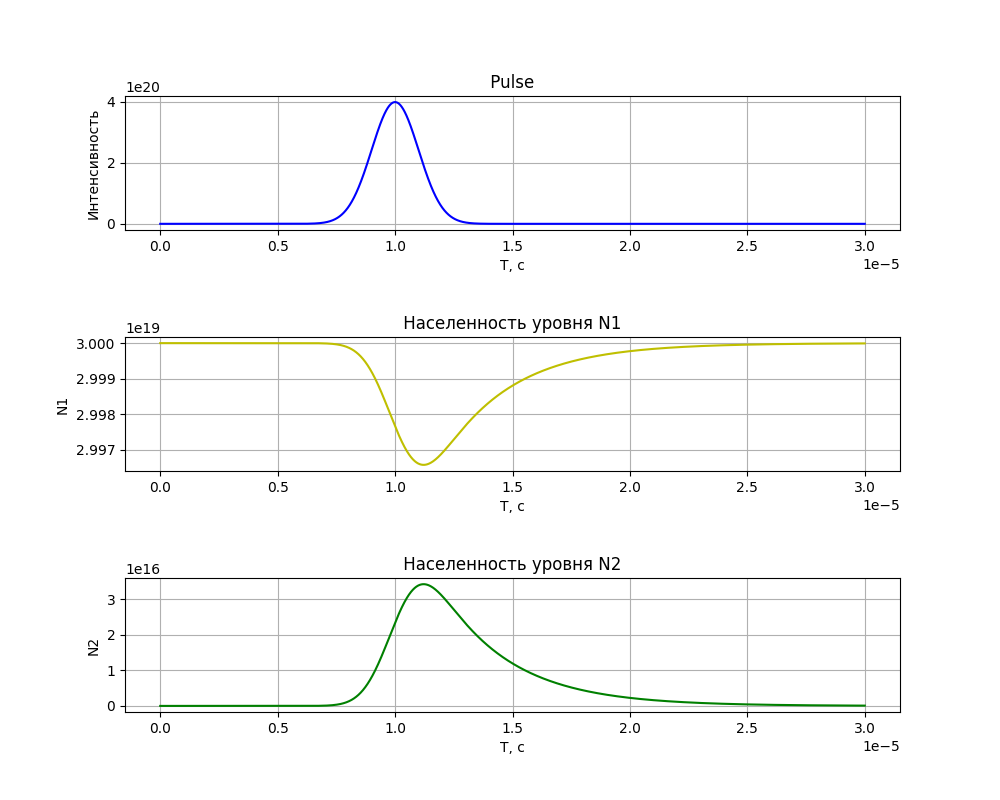

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# CONSTANTS
N0 = 3*10**19
slg = 10**-6
m = 1*10**-5
Rmax = 10**15
tau = 3*10**-6
sigma = 2*10**-18
h = 10**-9

def gauss_pulse(T, m, slg, Rmax):
    '''
    Функция pulse принимает время, мат ожидание, СКО и максимально значение амплитуды.
    Возвращает сгенерированный по Гауссу импульс.
    '''
    return [(Rmax/(slg*(2*3.14)**0.5))*math.exp(-1/(2*slg**2)*(T[i]-m)**2) for i in range(0, len(T))]

def euler_method(I, sigma, tau, N0):
    '''
    Функция euler_method принимает интенсивность излучения, сигму, время жизни tau, общее количество частиц N0.
    Решает кинетическое уравнение методом Эйлера и возвращает списки значений частиц на уровнях 
    N1 и N2 в течение времени T.
    '''
    N1, N2 = [N0], [0]
    for i in I[1:]:
        N1.append(N1[-1]+h*(sigma*i*(N0-2*N1[-1])+(N0-N1[-1])/tau))
        N2.append(N2[-1]-h*(sigma*i*(2*N2[-1]-N0)+N2[-1]/tau))
    return N1, N2

T = [i for i in np.arange(0, 0.00003, h)]
I = gauss_pulse(T, m, slg, Rmax)
N1, N2 = euler_method(I, sigma, tau, N0)

fig, ax = plt.subplots(figsize=(10,8), nrows=3, ncols=1)

ax[0].plot(T, I, 'b')
ax[0].set_xlabel('T, c')
ax[0].set_ylabel('Интенсивность')
ax[0].grid()
ax[0].set_title(' Pulse ')

ax[1].plot(T, N1, 'y')
ax[1].set_xlabel('T, c')
ax[1].set_ylabel('N1')
ax[1].grid()
ax[1].set_title(' Населенность уровня N1 ')

ax[2].plot(T, N2, 'g')
ax[2].set_xlabel('T, c')
ax[2].set_ylabel('N2')
ax[2].grid()
ax[2].set_title(' Населенность уровня N2 ')

plt.subplots_adjust(wspace=1, hspace=0.8)
plt.show()

<IPython.core.display.Javascript object>


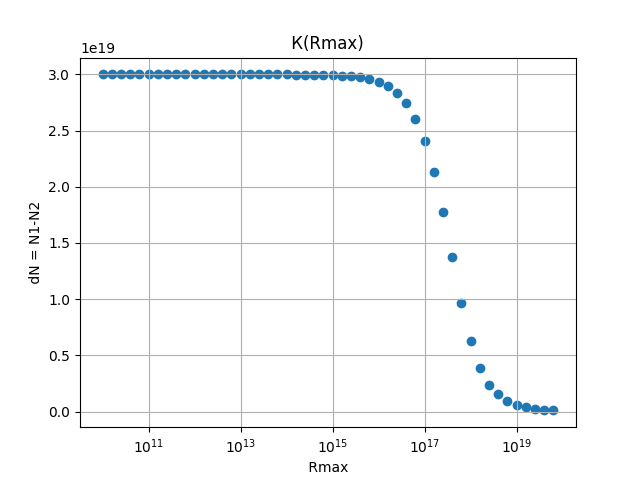

In [32]:
# Варьируем амплитуду импульса Rmax и запишем разности населенностей для них

Rmax_list = [10**i for i in np.arange(10, 20, 0.2)]
dN = []

for Rmax in Rmax_list:
    I = gauss_pulse(T, m, slg, Rmax)
    N1, N2 = euler_method(I, sigma, tau, N0)
    dN.append(min(N1) - max(N2))

plt.scatter(Rmax_list, dN)
plt.xscale('log')
plt.xlabel(' Rmax ')
plt.ylabel(' dN = N1-N2 ')
plt.title(' К(Rmax) ')
plt.grid()


<IPython.core.display.Javascript object>


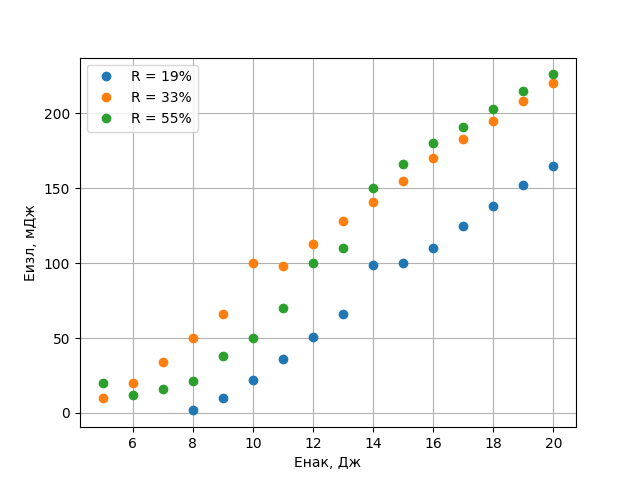

In [33]:
### ЛАБОРАТОРНАЯ 

import matplotlib.pyplot as plt

E_pump19 = [i for i in range(8, 21)]
E_gen19 = [1.7, 10, 22, 36, 51, 66, 99, 100, 110, 125, 138, 152, 165]

E_pump33 = [i for i in range(5, 21)]
E_gen33 = [10, 20, 34, 50, 66, 100, 98, 113, 128, 141, 155, 170, 183, 195, 208, 220]

E_pump55 = [i for i in range(5, 21)]
E_gen55 = [20, 12, 16, 21, 38, 50, 70, 100, 110, 150, 166, 180, 191, 203, 215, 226]

fig, ax = plt.subplots() 

ax.plot(E_pump19, E_gen19, linestyle = 'None' , marker = 'o')
ax.plot(E_pump33, E_gen33, linestyle = 'None' , marker = 'o')
ax.plot(E_pump55, E_gen55, linestyle = 'None' , marker = 'o')
ax.legend(['R = 19%', 'R = 33%', 'R = 55%'])
ax.set_xlabel('Енак, Дж')
ax.set_ylabel('Еизл, мДж')
plt.grid()
